# Week 3 – Image Encodings & HOG

## Objective
Understand **hand-crafted image encodings** and how Histogram of Oriented Gradients (HOG)
represents visual structure in images.

**Instructions**
- Read the markdown carefully
- Fill in cells marked with `TODO`
- Do NOT change cell order


In [1]:
# TODO: Import required libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog



## Step 1: Load Vehicle Damage Dataset
We use a **small curated subset** of the vehicle damage dataset provided by mentors. If by chance this part is confusing to you, because we haven't explicitly covered it, please ask for help.

In [3]:
# TODO: Load a few vehicle damage images from the dataset folder
# Convert images to grayscale
# Resize images to a fixed size (128x128)

image_dir = "cnn_data/train/damage"   # adjust if your path is slightly different
image_size = (128, 128)

images = []
image_names = []

for file in os.listdir(image_dir):
    if file.lower().endswith((".jpg", ".jpeg", ".png")):
        img_path = os.path.join(image_dir, file)

        # Load image
        img = cv2.imread(img_path)
        if img is None:
            continue

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Resize image
        resized = cv2.resize(gray, image_size)

        images.append(resized)
        image_names.append(file)

        # Load only a few images (for visualization)
        if len(images) == 5:
            break

images = np.array(images)

print("Loaded images shape:", images.shape)


Loaded images shape: (5, 128, 128)


## Step 2: Compute HOG Features
HOG captures gradient orientation information in localized regions.


In [4]:
# TODO: Compute HOG features and HOG visualizations

hog_features = []
hog_images = []

for img in images:
    features, hog_image = hog(
        img,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        visualize=True,
        block_norm="L2-Hys"
    )
    
    hog_features.append(features)
    hog_images.append(hog_image)

hog_features = np.array(hog_features)

print("HOG feature vector shape:", hog_features.shape)



HOG feature vector shape: (5, 8100)


## Step 3: Visualize HOG Representation
Compare the original image with its HOG visualization.


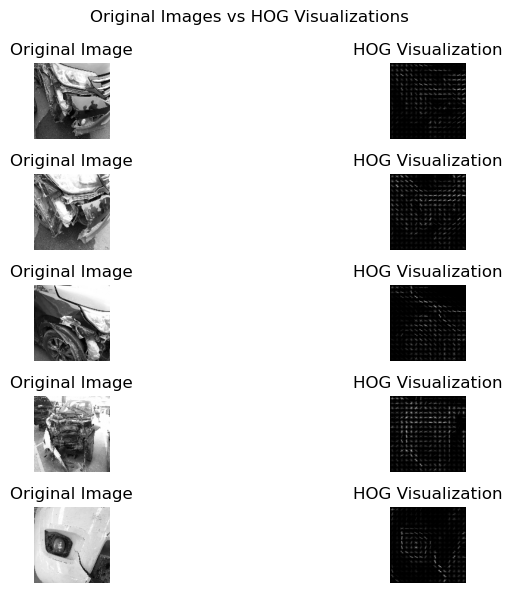

In [5]:
# TODO: Plot original image and corresponding HOG image

plt.figure(figsize=(10, 6))

for i in range(len(images)):
    # Original image
    plt.subplot(len(images), 2, 2*i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title("Original Image")
    plt.axis("off")

    # HOG image
    plt.subplot(len(images), 2, 2*i + 2)
    plt.imshow(hog_images[i], cmap="gray")
    plt.title("HOG Visualization")
    plt.axis("off")

plt.suptitle("Original Images vs HOG Visualizations")
plt.tight_layout()
plt.show()



## Step 4: Dimensionality Reduction
Apply PCA or t-SNE to HOG feature vectors to visualize structure.


PCA output shape: (5, 2)


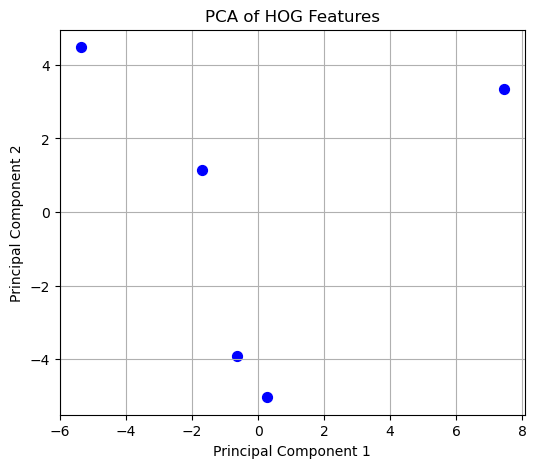

In [6]:
from sklearn.decomposition import PCA

# Reduce HOG features to 2D using PCA
pca = PCA(n_components=2)
hog_pca = pca.fit_transform(hog_features)

print("PCA output shape:", hog_pca.shape)

# Plot PCA result
plt.figure(figsize=(6, 5))
plt.scatter(hog_pca[:, 0], hog_pca[:, 1], c="blue", s=50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of HOG Features")
plt.grid(True)
plt.show()



## Reflection
- What visual information does HOG preserve?
- Why might HOG struggle with complex damage patterns?
